## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Get the Data

In [3]:
df = pd.read_csv('ABT_Titanic.csv')

In [4]:
print(df.shape)
df.head()

(889, 21)


,PassengerId,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,...,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,1,0,22.0,7.2500,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,38.0,71.2833,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,26.0,7.9250,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,35.0,53.1000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,35.0,8.0500,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 21 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Age            889 non-null float64
Fare           889 non-null float64
Pclass_2       889 non-null int64
Pclass_3       889 non-null int64
Sex_male       889 non-null int64
SibSp_1        889 non-null int64
SibSp_2        889 non-null int64
SibSp_3        889 non-null int64
SibSp_4        889 non-null int64
SibSp_5        889 non-null int64
SibSp_8        889 non-null int64
Parch_1        889 non-null int64
Parch_2        889 non-null int64
Parch_3        889 non-null int64
Parch_4        889 non-null int64
Parch_5        889 non-null int64
Parch_6        889 non-null int64
Embarked_Q     889 non-null int64
Embarked_S     889 non-null int64
dtypes: float64(2), int64(19)
memory usage: 146.0 KB


## Train Test Split

Let's split up the data into a training set and a test set!

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Decision Trees

We'll start just by training a single decision tree.

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtree = DecisionTreeClassifier()

In [12]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [13]:
predictions = dtree.predict(X_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       167
           1       0.65      0.68      0.66       100

    accuracy                           0.74       267
   macro avg       0.73      0.73      0.73       267
weighted avg       0.74      0.74      0.74       267



In [16]:
def confusion_mat(actual, prediction):
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix
    a=pd.DataFrame(confusion_matrix(actual,prediction), index='Positive Negative'.split(),
             columns='Positive Negative'.split())
    plt.figure(figsize=(5,5))
    ax=sns.heatmap(a, annot=True, fmt='.1f', square=1,linewidth=1., cbar=False)
    plt.title('Confusion Matrix')

None
[[130  37]
 [ 32  68]]


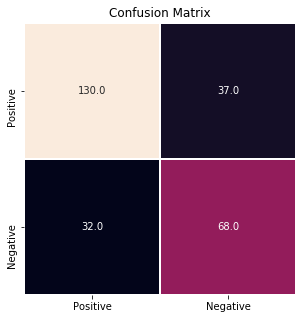

In [17]:
print(confusion_mat(y_test,predictions))
print(confusion_matrix(y_test,predictions))

In [19]:
print(f'Accuracy: {accuracy_score(y_test, predictions)*100}')

Accuracy: 74.15730337078652


## Random Forests


In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
rfc_pred = rfc.predict(X_test)

In [22]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       167
           1       0.76      0.69      0.72       100

    accuracy                           0.80       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.80      0.80      0.80       267



80.14981273408239


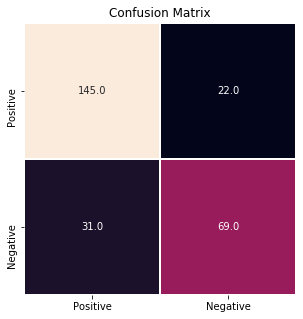

In [25]:
print(accuracy_score(y_test,rfc_pred)*100)

confusion_mat(y_test, rfc_pred)